## Step 1: EDA

In [69]:
## load required packages
import pandas as pd
import numpy as np 
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [70]:
## Load the data and check
import os 
os.chdir(r'D:\Dataset\Side_project_Video_Game_Sales')
print(os.getcwd())

games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
print(games.head())

print(games.info())

print(games.isnull().any())

os.chdir(r'D:\Project\Side_project_Video_Game_Sales')

D:\Dataset\Side_project_Video_Game_Sales
                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: Platform, dtype: int64


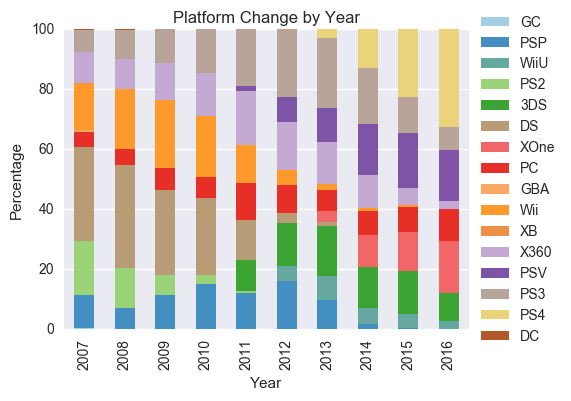

In [82]:
## Column: Platform
print(games.Platform.value_counts()[:10])

# Visualization: the change of platforms by years
games_yr = games.groupby(['Year_of_Release'])
#print(games_yr['Platform'].value_counts())
year_index = [float(x) for x in range(2007, 2017)]
plat_index = []
for year in year_index:
    plat_index.extend(list(games_yr['Platform'].value_counts()[year].index))
plat_index = list(set(plat_index))
# create the data frame for platforms and years
plat_year = pd.DataFrame(columns=year_index, index=list(set(plat_index)))
for year in year_index:
    plat_year[year] = games_yr['Platform'].value_counts()[year]
plat_year.columns = [str(int(x)) for x in year_index]
# fill the NAs as 0
plat_year.fillna(0)
# calculate the percentage for each platform in each year
plat_year_perc = plat_year.apply(lambda x: x/np.sum(x)*100, axis=0)
# plotting
plt.figure(figsize=[20, 20])
plat_year_perc.transpose().plot(kind='bar', stacked=True, colormap='Paired', edgecolor='none')
plt.subplots_adjust(bottom=0.15, right=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Platform Change by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.savefig('Platform_change_by_year.png', dpi=300)